# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

# Семинар 4. Матстатистика в анализе данных

## План семинара
- [Раздел 0. Идея статистического вывода. Статистические гипотезы](#Раздел-0.-Идея-статистического-вывода.-Статистические-гипотезы)
    - [Статистические гипотезы](#Статистические-гипотезы)
    - [Статистический критерий](#Статистический-критерий)
    - [Уровень статистической значимости (p-value)](#Уровень-статистической-значимости-(p-value))
    - [Ошибки первого и второго рода](#Ошибки-первого-и-второго-рода)
    - [Мощность критерия](#Мощность-критерия)
- [Раздел 1. Гипотезы о сравнении средних и t-тест](#Раздел-1.-Гипотезы-о-сравнении-средних-и-t-тест)
    - [Случай несвязных выборок](#Случай-несвязных-выборок)
    - [Случай связных выборок](#Случай-связных-выборок)
    - [Требования к данным](#Требования-к-данным)
- [Раздел 2. Статистические гипотезы с Хи-квадрат](#Часть-2.-Статистические-гипотезы-с-Хи-квадрат)
    - [Сравнение эмпирического распределения с теоретическим](#Сравнение-эмпирического-распределения-с-теоретическим)
    - [Сравнение двух экспериментальных распределений](#Сравнение-двух-экспериментальных-распределений)
- [Раздел 3. A/B-тестирования](#Часть-3.-A-B-тестирования)
    - [Что такое A/B-тестирование](#Что-такое-А-В-тестирование)
    - [Дизайн эксперимента](#Дизайн-эксперимента)
    - [Выборочное среднее](#Выборочное-среднее)
    - [Пример задачи](#Пример-задачи)
    - [Связь биномиального распределения с нормальным](#Связь-биномиального-распределения-с-нормальным)
    - [Зависимость дисперсии среднего от числа примеров в эксперименте](#Зависимость-дисперсии-среднего-от-числа-примеров-в-эксперименте)
    - [Z-test](#Z-test)
    - [Проведение эксперимента (A/B-тест)](#Проведение-эксперимента-А-В-тест)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Раздел 0. Идея статистического вывода. Статистические гипотезы

Для начала, немного теории из математической статистики.

### Статистические гипотезы

Исследователю в процессе работы часто приходится отвечать на вопросы типа:
1. Можно ли утверждать, что новый баннер увеличивает CTR (click-through rate)?
2. Действительно ли разаботанное лекарство ускоряет процесс выздоравления пациентов?
3. Правда ли, что средняя продолжительность жизни в двух конкретных странах разная?
4. И др.

Для того, чтобы ответить на эти вопросы необходимо сформулировать статистические гипотезы. Формулирование гипотез систематизирует предположения исследователя и представляет их в четком и лаконичном виде.



Статистические гипотезы разделяют на **нулевые** и **альтернативные**:
1. **Нулевая гипотеза $H_0$** - это гипотеза об отсутствии различий. Нулевая гипотеза - это то, что мы хотим опровергнуть, если перед нами стоит задача доказать значимость различий.
2. **Альтернативная гипотеза $H_1$** - это гипотеза о значимости различий, то, что мы хотим доказать.


Например, для третьего вопроса гипотезы можно сформулировать следующим образом:
1. **Нулевая гипотеза $H_0$**: среднии продолжительности жизни в этих странах **равны**.
2. **Альтернативная гипотеза $H_1$**: среднии продолжительности жизни в этих странах **не равны**.

**Задание 1.** 

Сформулируйте нулевую и альтернативную гипотезы для первого и второго вопроса.

**Решение:**

Для первого.
1. **Нулевая гипотеза $H_0$**: CTR при отображении нового и старого баннера **совпадает**.
2. **Альтернативная гипотеза $H_1$**: CTR при отображении нового баннера **выше**, чем при отображении старого баннера.

Для второго.
1. **Нулевая гипотеза $H_0$**: продолжительности выздоравления пациентов, принимающих лекарство и лекарство не принимающих, **равны**.
2. **Альтернативная гипотеза $H_1$**: продолжительность выздоровления пациентов, принимающих лекарство, **ниже**, чем пациентов, лекарство не принимающих.

### Статистический критерий

Статистический критерий - это решающее правило, обеспечивающее надежное поведение, то есть принятие истинной и отклонение ложной гипотезы с высокой вероятностью. Статистические критерии обозначают также метод расчета определенного числа и само это число.

Говоря более простым языком, именно с помощью соответствующего (верно подобранного) статистического критерия можно проверить статистическую гипотезу

### Уровень статистической значимости (p-value)

**Уровень значимости** - это вероятность того, что мы сочли различия существенными, а они на самом деле случайны.
Когда мы указываем, что различия достоверны на $5\%$-ом уровне значимости, или при $р<0,05$, то мы имеем виду, что вероятность того,
что они все-таки недостоверны, составляет $0,05$.

Если перевести все это на более формализованный язык, то уровень значимости - это вероятность отклонения нулевой гипотезы, в то
время как она верна.

Нулевую гипотезу отклоняют (обычно), если достигнутый уровень значимости $р<0,05$.

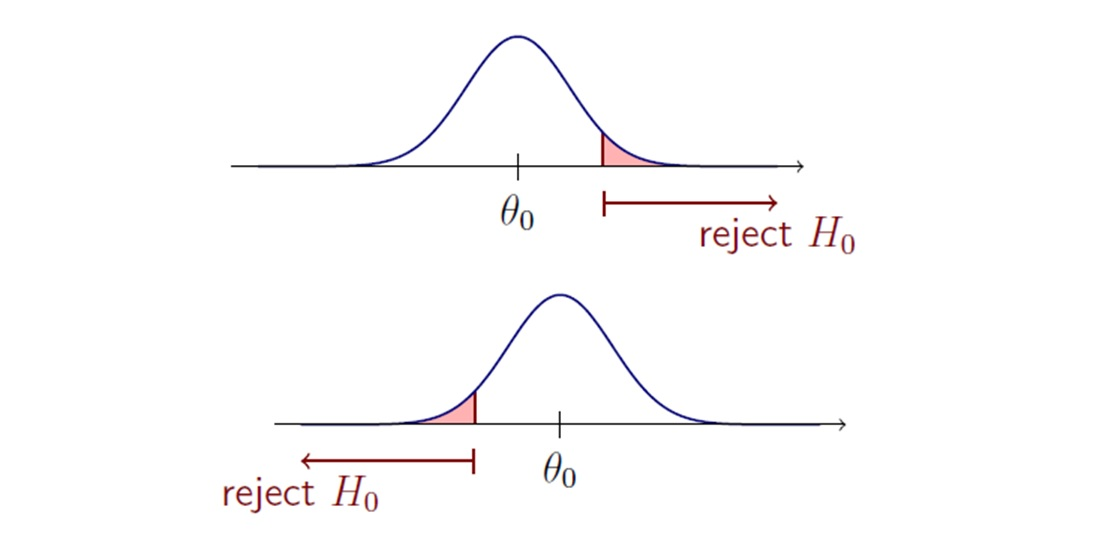

### Ошибки первого и второго рода

- **Ошибкой I рода** называется ошибка, состоящая в том, что мы **отклонили** нулевую гипотезу, в то время как она верна.
- **Ошибкой II рода** называется ошибка, состоящая в том, что мы **приняли** нулевую гипотезу, в то время как она неверна.

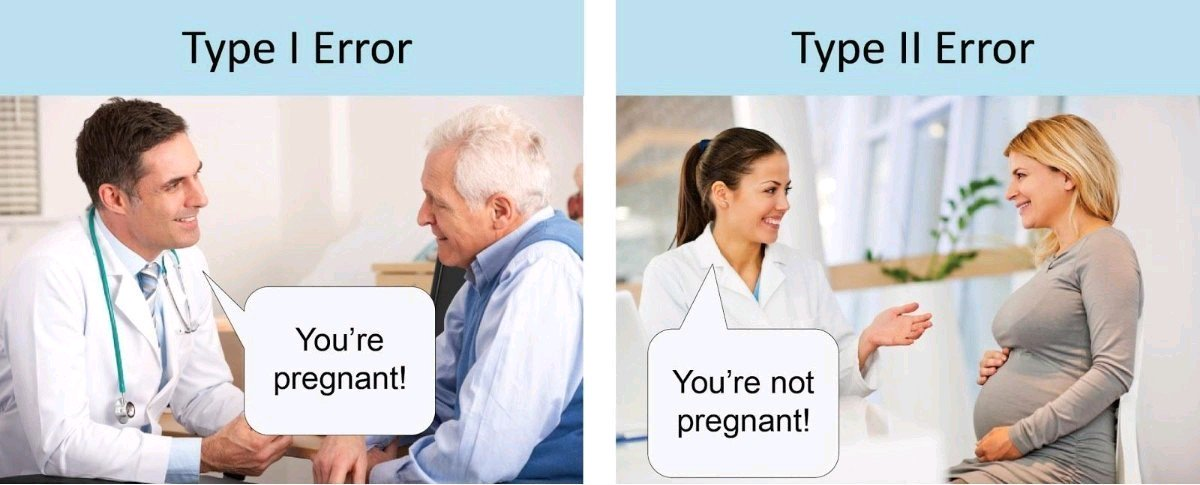

### Мощность критерия

**Мощность критерия** - это его способность выявлять различия, если они есть. Иными словами, это его способность отклонить нулевую гипотезу об отсутствии различий, если она неверна.


Вероятность ошибки II рода обозначается как $\beta$.

Мощность критерия - это его способность не допустить ошибку II рода, поэтому:

   - Мощность $ = 1 - \beta$.

Мощность критерия определяется эмпирическим путем. Одни и те же задачи могут быть решены с помощью разных критериев, при
этом обнаруживается, что некоторые критерии позволяют выявить различия там, где другие оказываются неспособными это сделать, или выявляют более высокий уровень значимости различий. Возникает вопрос:
а зачем же тогда использовать менее мощные критерии? Дело в том,
что основанием для выбора критерия может быть не только мощность,
но и другие его характеристики, а именно:
- простота
- более широкий диапазон использования (например, по отношению к данным, определенным по номинативной шкале, или по отношению к
большим $n$)
- применимость по отношению к неравным по объему выборкам

## Раздел 1. Гипотезы о сравнении средних и t-тест

In [2]:
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm

**t-критерий Стьюдента** (или **t-тест**) направлен на оценку различий велечин средних $\bar{X}$ и $\bar{Y}$ двух выборок $X$ и $Y$, которые распределенны по нормальному закону. Критерий может быть использован для сопоставления средних у связных и несвязных выборок, причем выборки могут быть не равны по величине.

t-критерий Стьюдента основан на **распределении Стьюдента** - однопараметрическом непрерывном распредлении, где в качестве параметра выступает **число степеней свободы $n$**. Число степений свободы считается как количество элементов выборки минус 1.

Распределение Стьюдента очень похоже на нормальное распределение, но его график плотности при малом количестве степеней свободы имеет более тяжелые хвосты - случайная величина чаще **сильно** отклоняется от своего среднего значения. При $n\geq30$ практически полностью совпадает с нормальным распределением.

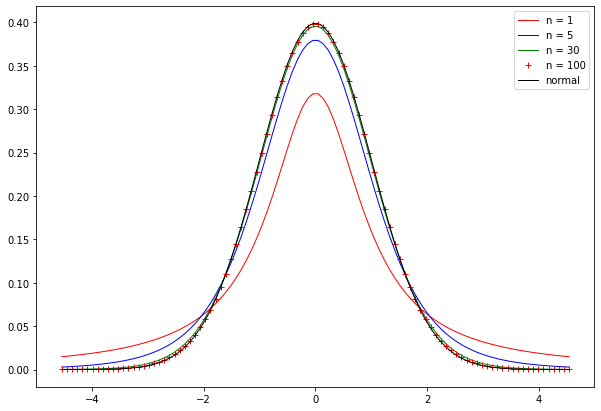

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1), 'r', lw=1, label='n = 1')
ax.plot(x, t.pdf(x, 5), 'b-', lw=1, label='n = 5')
ax.plot(x, t.pdf(x, 30), 'g-', lw=1, label='n = 30')
ax.plot(x, t.pdf(x, 100), 'r+', lw=1, label='n = 100')
ax.plot(x, norm.pdf(x), 'black', lw=1, label='normal')
ax.legend();

### Случай несвязных выборок

Рассмотрим следующий пример:

Психолог измерял время сложной сенсомотороной реакции выбора (в мс) в контрольной и эксперментальной группах. В экспериментальную группу ($X$) входили 9 спортсменов высокой квалификации. Контрольной группой ($Y$) являлись 8 человек, активно не занимающиеся спортом. Психолог проверяет гипотезу о том, что средняя скорость сложной сенсомоторной реакции выбора у спортсменов выше, чем эта же величина у людей, не занимающихся спортом.

В результате эксперимента получились следующие средние значения:
- Для спортсменов: $\bar{X} = 526$
- Для не занимающихся спортом: $\bar{Y} = 638$

Сырые данные эксперимента приведены ниже.

In [4]:
# Экспериментальная группа
X_1 = [504, 560, 420, 600, 580, 530, 490, 580, 470]
# Контрольная группа
Y_1 = [580, 692, 700, 621, 640, 561, 680, 630]

**Задание 2.** 

Сформулируйте нулевую и альтернативную гипотезы.

**Решение:**

1. **Нулевая гипотеза $H_0$**: время сложной сенсомоторной реакции выбора в контрольной и экспериментальной группах **совпадает**.
2. **Альтернативная гипотеза $H_1$**: время сложной сенсомоторной реакции выбора в экспериментальной группе **ниже**, чем в контрольной.

Проверим, является ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) для **несвязных** выборок.

In [ ]:
ttest_ind(X_1, Y_1)

**Вопрос 3.** 

Что можно сказать про результаты теста?

**Решение:**

**pvalue** равно 0.0008, что соотвествует 0,08%. Это значение меньше уровня значимости, установленного нами в 5%, значит мы отвергаем нулевую гипотезу об отсуствии различий и принимаем альтернативную гипотезу о том, что время сложной сенсомоторной реакции выбора в экспериментальной группе ниже, чем в контрольной.

**Задание 4.** 

Допустим, в ходе исследования мы хотели выяснить, влияет ли новый разработанный препарат на скорость выздоравления. Экспериментальная группа получала разработанный препарат, а контрольная - нет. Мы замеряли время выздоравления и применили t-тест к полученным данным. И в итоге получили $p = 0.004$.

Выберете правильные утверждения:

1. Т.к. в нашем исследовании $p$ уровень значимости равен 0,004, то вероятность того, что верна нулевая гипотеза (новый препарат не влияет на скорость выздоровления) также равняется всего-лишь 0,004.
2. Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза, и новый препарат не влияет на скорость выздоровления.
3. Чем меньше p уровень значимости, тем сильнее получаемые различия. Например, если бы p уровень значимости в нашем исследовании был бы равен 0,0001, значит новый препарат еще сильнее бы влиял на скорость выздоровления.
4. Вероятность получить такие (как в эксперименте) или большие различия между среднем временнем выздоравления в экспериментальной и контрольной группе, при условии того, что нулевая гипотеза верна, равна 0.004.

**Решение:**

Верным утверждением является только четвертое утверждение.

Комментарии по ошибочным утверждениям:

1. О вероятности верности нулевой гипотезы никогда не идет речи в рамках проверки статистических гипотез. Речь идет о том, есть ли у нас основания отвергать нулевую гипотезу, или оснований отвергать нулевую гипотезу у нас нет. Поэтому мы не можем ничего сказать о вероятности верности нулевой гипотезы, а лишь о вероятности появления таких данных, в случае ее верности.

2. Нет, это лишь означало бы то, что у нас нет оснований отвергать нулевую гипотезу. (Но может быть если бы мы сделали эксперимент по-другому, основания бы появились. Поэтому речи о "доказательстве" нулевой гипотезы никогда не идет. Лишь об отсутствии оснований ее отвергать)

3. Такие выводы ни на чем не основаны и ничем не подтверждены. Напрямую из определения p-value это не следует. Да, в одном случае вероятность получения данных у нас 0,4%, а в другом случае лишь 0,01%. Но есть ли статистически значимая разница между этими экспериментами, или эта разница сама по себе уже является случайной погрешностью - для этого нужно создавать отдельную статистическую гипотезу и проверять ее. Исходя из данного эксперимента, мы можем лишь констатировать, что и там, и там различия статистически значимы и препарат действует (но как эти различия связаны друг с другом и где он действует сильнее - говорить мы не можем, так как не тестировали это)

### Случай связных выборок

Рассмотрим следующий пример:

Психолог предположил, что в результате обучения время решения эквивалентных задач (т.е. имеющих один и тот же алгоритм решения) будет значимо уменьшаться. Для проверки гипотезы у восьми испытуемых сравнивалось время решения (в минутах) первой и третьей задач.

В результате эксперимента получились следующие средние значения:
- Для первой задачи: $\bar{X} = 4.6375$
- Для третьей задачи: $\bar{Y} = 3.4875$

Сырые данные приведены ниже.

In [6]:
# Время, потраченое на решение первой задачи
X_2 = [4.0, 3.5, 4.1, 5.5, 4.6, 6.0, 5.1, 4.3]
# Время, потраченое на решение третьей задачи
Y_2 = [3.0, 3.0, 3.8, 2.1, 4.9, 5.3, 3.1, 2.7]

**Задание 5.** 

Сформулируйте нулевую и альтернативную гипотезы.

**Решение:**

1. **Нулевая гипотеза $H_0$**: время решения эквивалентных задач **не изменяется** с каждой последующей решенной задачей.
2. **Альтернативная гипотеза $H_1$**: время решения эквивалентных задач **уменьшается** с каждой последующей решенной задачей.

Проверим, являются ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) для **связных** выборок.

In [ ]:
ttest_rel(X_2, Y_2)

**Вопрос 6.** 

Что можно сказать про результаты теста?

**Решение:**

**pvalue** равно 0.0266, что соотвествует 2,6%. Это значение меньше уровня значимости, установленного нами в 5%, значит мы отвергаем нулевую гипотезу об отсуствии различий и принимаем альтернативную гипотезу о том, что время решения эквивалентных задач уменьшается с каждой последующей решенной задачей.

### Требования к данным

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:
- **несвязные выборки**:
    1. Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
    2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
    
    
- **связные выборки**:
    1. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

#### Проверка гомогенности дисперсий

In [8]:
from scipy.stats import levene

Проверить гомогенность дисперсий можно с помощью **критерия Левена**. Проделаем это для примера с несвязными выборками, используя функцию [`levene`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene).

In [ ]:
levene(X_1, Y_1)

**Вопрос 7.** 

Что можно сказать про результаты теста?

**Решение:**

Согласно документации, в критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

**pvalue** этой гипотезы у нас получилось равно 0.565, что соотвествует 56,5%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборка имеет негомогенные дисперсии.

#### Проверка нормальности распределения

In [10]:
from scipy.stats import shapiro

Проверить распределение на нормальность можно:
- визуально с помощью **графика квантиль-квантиль (Q-Q plot)** или
- с помощью **критерия Шапиро-Уилка**

Давайте сначала проверим наши выборки по критерию Шапиро-Уилка ([`shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro))

In [ ]:
shapiro(X_1)

**Вопрос 8.** 

Что можно сказать про результаты теста?

**Решение:**

Согласно документации, в критерии Шапиро-Уилка, нулевой гипотезой является гипотеза о том, что данные выборки распределены нормально.

**pvalue** этой гипотезы у нас получилось равно 0.673, что соотвествует 67,3%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборка имеет ненормальное распределение.

Теперь давайте для начала потренируемся в интерпретации [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) на синтетических данных. Воспользуемся функцией [`qqplot`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html).

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Normal_normal_qq.svg" width="400">

In [ ]:
from statsmodels.api import qqplot

1. Сгенерируем четыре выборки размером 1000:
    - из нормального распределения
    - из нормального распределения, скошенного впрово [`skewnorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html),  с коэффициентом ассиметрии $= 2$
    - из нормального распруделения, скошенного влево, с коэффициентом ассиметрии $= -2$
    - из распределения Стьюдента с двумя степенями свободы
2. Для каждой выборки построим Q-Q plot. Будем сравнивать с нормальным распределением, так же будем отображать контрольную линию.
3. Также, для каждой выборки построим график её плостности распределения и плотности нормального распределения.

3. Проинтерпретируем графики

In [ ]:
# Нормальное распределение

norm_dist = norm.rvs(size=1000)
fig = qqplot(norm_dist, norm, line='45', fit=True)

In [ ]:
# Нормальное распределение, скошенное вправо
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'r-', label='norm')
ax.plot(x, skewnorm(a=2).pdf(x), 'b-', label='skew')
ax.legend()

fig = qqplot(skewnorm(a=2).rvs(1000), norm, line='45', fit=True)

In [ ]:
# Нормальное распределение, скошенное влево
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'r-', label='norm')
ax.plot(x, skewnorm(a=-2).pdf(x), 'b-', label='skew')
ax.legend()

fig = qqplot(skewnorm(a=-2).rvs(1000), norm, line='45', fit=True)

In [ ]:
# Распределение Стьюдента, n = 2
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'b-', label='norm')
ax.plot(x, t(4).pdf(x), 'r-', label='t')
ax.legend()

fig = qqplot(t(4).rvs(1000), norm, line='45', fit=True)

Теперь проверим наши данные на нормальность с помошью Q-Q plot.

In [ ]:
fig = qqplot(np.array(X_1), norm, line='45', fit=True)

## Раздел 2. Статистические гипотезы с Хи-квадрат

Критерий $\chi^2$ используют в двух случаях:
1. Для расчета согласия эмперического распределения и предполагаемого теоретического. В этом случае проверяется нулевая гипотеза об отсутствии различий между теоретическим и эмперическим распределениями.

2. Для расчета однородности двух независимых экспериментальных выборок. В этом случае проверятеся гипотеза $H_0$ об отсутствии различий между двумя эмпирическими (экспериментальными) распределениями.


Критерий основан на **распределении $\chi^2$**. **Распределении $\chi^2$ с $k$ степенями свободы** - это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин.

Если
$$Y = \sum\limits_{i=1}^{k} X_i$$ и $$X_i \sim N(0, 1)$$ то $$Y \sim \chi^2_k$$

По выборке параметр $k$ определяется как число элементов в выборке минус 1.

Графики плотности распределения для разных значений $k$.
<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Chi-square_distributionPDF.png?uselang=ru" width=500>

Исходнык данные для $\chi^2$ могут буть представлены в любой шкале, например категоральной. Тогда, решаемый вопрос можно было бы сформулировать так: с одинаковой ли частотой встречаются разные значения признака в эмпирическом и теоретическом распределениях.


Критерий построен так, что при полном совпадении экспериментального и теоретического (или двух экспериментальных) распределений величина $\chi^2_{эмп}$ (*хи*-квадрат эмпирическое) $=0$, и чем больше расхождение между сопоставляемыми распределениями, тем больше величина значения $\chi^2_{эмп}$.

### Сравнение эмпирического распределения с теоретическим

#### Пример с игральной костью
Предположим, что исследователю в эксперименте необходимо использовать игральный кубик (шестигранный). Для чистоты эксперимента кубик должен быть "идеальным", т.е. таким, чтобы при достаточно большом числе подбрасываний, каждая грань выпадала бы примерно равное число раз. Задача состоит в выяснении того, будет ли данный кубик близок к идеальному?

Чтобы это проверить, исследователь подбросил кубик 60 раз, при этом количество выпадений каждой грани распределилось следующим образом:

| **Грани кубика**| 1 | 2 | 3 | 4 | 5 | 6 |
|------|------|------|------|------|------|------|
|**Эмпирические частоты** | 12 | 9 | 11 | 14 | 8 | 6 |
|**Теоретические частоты** | 10 | 10 | 10 | 10 | 10 | 10 |



**Задание 9.**

 Сформулируйте нулевую и альтернативную гипотезы.



**Решение:**

1. **Нулевая гипотеза $H_0$**: распределение значений, выпадаемых на нашем кубике, **совпадает** с распределением значений, выпадаемых на "идеальном" кубике.
2. **Альтернативная гипотеза $H_1$**: распределение значений, выпадаемых на нашем кубике, **не совпадает** с распределением значений, выпадаемых на "идеальном" кубике.

Применим критерий $\chi^2$, воспользовавшись функцией [`chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)

In [ ]:
from scipy.stats import chisquare

chisquare([12, 9, 11, 14, 8, 6])

**Вопрос 10.** 

Что можно сказать про результаты теста?

**Решение:**

В критерии Хи-квадрат, нулевой гипотезой является гипотеза о том, что различий между распределениями нет.

**pvalue** этой гипотезы у нас получилось равно 0.52, что соотвествует 52%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что распределение значений, выпадаемых на нашем кубике неидеально.

### Сравнение двух экспериментальных распределений

На практике часто встречаются задачи, в которых необходимо сравнивать не теоретическое распределение с эмпирическим, а два и более эмпирических распределения между собой.

Рассмотрим задачу:

Одинаков ли уровень подготовленности учащихся в двух школах, если в первой школе из 100 человек поступило в вуз 82 человека, а во второй школе из 87 поступили 44?

**Таблица сопряженности:**

|№ школы|школа 1|школа 2|
|------|------|------|
|**Число поступивших**|82|18|
|**Число не поступивших**|44|43|
|**Всего**|126|61|


**Задание 11.**

 Сформулируйте нулевую и альтернативную гипотезы.



**Решение:**

1. **Нулевая гипотеза $H_0$**: распределение значений случайной величины "число поступивших после школы" **совпадает** для двух представленных школ.
2. **Альтернативная гипотеза $H_1$**: распределение значений случайной величины "число поступивших после школы" **не совпадает** для двух представленных школ.


Применим критерий $\chi^2$, воспользовавшись функцией [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [ ]:
from scipy.stats import chi2_contingency

c_table = np.array([[82, 18], [44, 43]])
chi2_contingency(c_table)

**Вопрос 12.** 

Что можно сказать про результаты теста?

**Решение:**

В критерии Хи-квадрат, нулевой гипотезой является гипотеза о том, что различий между распределениями нет.

Как можно видеть из второй строчки вывода (документация поможет понять нам, что это нужная строчка), **pvalue** этой гипотезы у нас получилось равно $10^{-5}$. Это значение меньше уровня значимости, установленного нами в 5%, значит мы отвергаем нулевую гипотезу об отсуствии различий и принимаем альтернативную гипотезу о том, что распределение значений случайной величины "число поступивших после школы" не совпадает для двух представленных школ.

## Раздел 3. A/B-тестирования



А теперь поговорим о, пожалуй, самой важности области применения мат.статистики в бизнесе



### Что такое A/B-тестирование


- Метод маркетингового исследования
- Набор пользователей разбивается на контрольную и тестовую группы
- В тестовой группе вносится некоторое изменение
- Эффект от изменений оценивается сравнением целевых метрик в
группах

<img src=https://northcreation.agency/assets/Uploads/ab-testing.jpg width="500"/>

### Дизайн эксперимента



- Зафиксировать цели и метрики эксперимента
- Исключить внешние факторы
- Оценить необходимый объем выборки и время проведения
эксперимента
- Собрать данные
- Оценить эффект

Оценка эффекта крайне важный этап A/B-тестирования. Наша разница случайна?

<img src=https://annalyzin.files.wordpress.com/2017/07/ab-stdev.png width="800"/>

###  Выборочное среднее

Чаще всего в рамках эксперимента нам необходимо работать с каким-либо средним показателем. В связи с этим вспомним понятие выборочного среднего:

- приближение теоретического среднего распределения, основанное на выборке
- дисперсия оценки зависит от числа наблюдений

Три случайные выборки из одной совокупности дают три разные величины среднего и стандартного отклонения.



Таким образом, как связаны дисперсия выборочного среднего и размер выборки?

- в процессе эксперимента получаем N значений
- оцениваем среднее полученных значений
- повторяем эксперимент M раз
- получаем M оценок средних
- дисперсия этих оценок зависит от числа наблюдений в эксперименте

###  Пример задачи

<img src=https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/9101cdea-2c14-4c82-ba49-56d16a4c7ee8/abtesting-small.gif width="500"/>

Предположим, что мы хотим провести редизайн сайта интернет-магазина и наша задача оценить какой из макетов наиболее "кликабельный".

Для этого мы будем оценивать показатель CTR (click-through rate) у двух групп пользователей. Первым (группа A) будем показывать старый дизайн, а вторым (группу B) - новый. 

В данной задаче мы имеем дело с последовательностью независимых случайных событий: "пользователь кликнул/не кликнул". Совокупность таких событий для $n = 1$ (одного проведенного эксперимента) подчинена распределению Бернулли, а при $n > 1$ - биномиальному распределению, т.е. распределению количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

**Вопрос 13.** 

Как связаны биномиальное распределение и нормальное?

**Решение:**

При больших n или при большом числе повторяющихся биномиальных экспериментов, биномиальное распределение сводится к нормальному.

Более подробно см. ниже

### Связь биномиального распределения с нормальным

<img src=https://slideplayer.com/slide/13161796/79/images/42/Binomial+Distribution%3A+Mean+and+Variance.jpg width="500"/>

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal

#### Сгенерируем выборку данных из исходного распределения

In [20]:
np.random.seed(2111)

In [21]:
P = 0.1  # convertion rate
N = 20   # sample size

In [ ]:
sample = binomial(1, P, N)
print('sample: %s' % sample)
print('mean: %s' % np.mean(sample))

#### Оценим параметры распределения

In [23]:
M = 1000  # number of experiments

In [ ]:
experiments = binomial(1, P, (M, N))
print('experiemnts shape: %sх%s' % experiments.shape)

In [ ]:
# оценим среднее для каждого эксперимента
means = np.mean(experiments, axis=1)
means

In [ ]:
# оценим дисперсию средних
means_std = np.var(means)
means_std

#### Оценим зависимость дисперсии от числа наблюдений

In [27]:
# построим график зависимости дисперсии от числа наблюдений
means_stds = []
k = np.arange(20, 2000, 20)
for i in k:
  experiments = binomial(1, P, (i, N))
  means = np.mean(experiments, axis=1)
  means_stds.append(np.var(means))

In [ ]:
plt.plot(k, means_stds)

**Вопрос 14:** 

Какие выводы можно сделать? Уменьшается ли дисперсия?

**Решение:**

Исходя из графика, дисперсия значимо не уменьшается. А мы бы хотели, чтобы уменьшалась. Поэтому осуществим переход к нормальному

####  Аппроксимация биномиального распределения нормальным

Если n достаточно велико, то в этом случае разумное приближение $\mathrm{Bin} (n, p)$ дается нормальным распределением: $\mathcal{N} (np, \, np (1-p))$

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Binomial_Distribution.svg/1920px-Binomial_Distribution.svg.png width="500"/>

Сравним распределение средних с нормальным

$\mu = p$

$\sigma = \sqrt{\frac{p(1-p)}{n}}$

In [29]:
# https://en.wikipedia.org/wiki/Bernoulli_distribution
mean = P
std = np.sqrt(P * (1 - P) / N)

In [ ]:
# сравним распределение с нормальным

normal_distr = normal(loc=P, scale = std, size=N)
print('norm_mean: %.5f' % np.mean(normal_distr), 'bin_mean: %.5f' % mean)
print('norm_std: %.5f' % np.std(normal_distr), 'bin_std: %.5f' % std)

### Зависимость дисперсии среднего от числа примеров в эксперименте

#### Центральная пределная теорема



Вспомнить ЦПТ можно, например, тут:

https://en.wikipedia.org/wiki/Central_limit_theorem

<img src=https://i.ibb.co/0ckyS0F/Screenshot-2020-02-27-at-07-59-01.png width="800"/>


https://www.youtube.com/watch?v=jvoxEYmQHNM

In [31]:
POPULATION_STD = 10.  # задаем дисперсию в популяции

In [32]:
# Функция генерации данных экспериментов
def gen_expiremnts(mean=0,
                   n_samples=10,
                   n_experiements=500):
    return np.random.normal(loc=mean,
                            scale=POPULATION_STD,
                            size=(n_experiements, n_samples))

In [ ]:
gen_expiremnts(mean=0,
                   n_samples=2,
                   n_experiements=4)

In [34]:
# Проводим 500 экспериментов с разным числом наблюдений
sample_mean_std = []
n_samples = list(range(10, 110, 10))
for n in n_samples:
    data = gen_expiremnts(n_experiements=500, n_samples=n)
    means = np.mean(data, axis=1)         # вычисляем среднее для каждого эксперимента
    sample_mean_std.append(np.std(means)) # сохраняем дисперсию средних

In [ ]:
sample_mean_std

In [36]:
# Зависимость дисперсии средних от числа наблюдений по ЦПТ
sample_mean_std_clt = POPULATION_STD / np.sqrt(n_samples)

In [ ]:
# Оцениваем зависимость дисперсии средних от числа наблюдений в эксперименте
# Сравниваем с теоретическими значениями по ЦПТ
plt.figure(figsize=(10, 6))
plt.plot(n_samples, sample_mean_std, '-o',
         n_samples, sample_mean_std_clt, '-*')
plt.xlabel('n_samples')
plt.ylabel('sample mean std')
plt.legend(['experimental', 'CLT'])
plt.title('Sample mean std vs sample size');

### Z-test

Очень удобный статистический тест для проверки гипотез при использовании ЦПТ

https://en.wikipedia.org/wiki/Z-test

Z-тест - это любой статистический тест, для которого распределение тестовой статистики в соответствии с нулевой гипотезой может быть аппроксимировано нормальным распределением. Из-за центральной предельной теоремы многие тестовые статистические данные примерно нормально распределяются для больших выборок. Для каждого уровня значимости в доверительном интервале Z-критерий имеет одно критическое значение, что делает его более удобным, чем t-критерий Стьюдента, который имеет отдельные и разные критические значения для каждого размера выборки. Поэтому многие статистические тесты могут быть удобно выполнены как приблизительные Z-тесты, если размер выборки большой.

In [38]:
MEAN_A = 10           # среднее значение в эксперименте A
MEAN_B = 12           # среднее значение в эксперименте B
POPULATION_STD = 10.  # задаем дисперсию в популяции
N_SAMPLES = 250       # число наблюдений в каждом из экспериментов

In [39]:
# Семплируем данные экспериментов
X_a = np.random.normal(loc=MEAN_A,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_b = np.random.normal(loc=MEAN_B,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_mean_a = np.mean(X_a)
X_mean_b = np.mean(X_b)

In [ ]:
# Визуализируем данные экспериментов 
plt.hist([X_a, X_b])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

In [41]:
# Оцениваем стандартную ошибку
se_a = se_b = POPULATION_STD / np.sqrt(N_SAMPLES)
se_ab = np.sqrt(se_a ** 2 + se_b ** 2)  # стандартная ошибка разности

In [ ]:
diff = (X_mean_b - X_mean_a)       # разность средних значений двух экспериментов
z = diff / se_ab                   # вычисляем z-статистику
z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики
print('diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile))

In [ ]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('z-distribution diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile));

**Вопрос 15:**

Что можно сказать о результатах?

**Решение:**

Поскольку положение z-статистики находится правее границы для 97,5% уровня доверия (2,5%-уровня значимости), мы отвергаем нулевую гипотезу об отсутствии различий, то есть принимаем альтернативную гипотезу о том, что различия между средними двух выборок существенны

### Проведение эксперимента (A/B тест)

#### Сгенерируем семплы

In [ ]:
P1 = 0.1
P2 = 0.11
N1 = 100
N2 = 100

In [ ]:
sample1 = binomial(1, P1, N1)
sample2 = binomial(1, P2, N2)

In [ ]:
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
diff = mean2 - mean1
print('mean1: %s' % mean1)
print('mean2: %s' % mean2)
print('mean1 - mean2: %s' % diff)

#### Оценим выборочное (pooled) среднее и дисперсию

In [ ]:
P_pool = (np.sum(sample1 == 1) + np.sum(sample2 == 1)) / (N1 + N2)
std_pool = np.sqrt(P_pool * (1 - P_pool) / (N1 + N2))

In [ ]:
confidence = 0.975
z = st.norm.ppf(confidence)
margin = z * std_pool
print('z: %s' % z)

#### Случайно ли различие в средних?

In [ ]:
print('margin: %s' % margin)
print('diff: %s' % diff)
print('Are they different (diff > margin)? -> %s' % (abs(diff) > margin))

**Задание 16.** 

При каком размере семплов различие в 1% будет значимым?

**Решение:**

На самостоятельное тестирование